In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
filepath = 'cps_85_wages.csv'
df = pd.read_csv(filepath,index_col=0)
print(df.info())
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 8 to 16
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SOUTH       534 non-null    object 
 1   SEX         534 non-null    object 
 2   EXPERIENCE  534 non-null    int64  
 3   UNION       534 non-null    object 
 4   WAGE        534 non-null    float64
 5   AGE         534 non-null    int64  
 6   RACE        534 non-null    object 
 7   OCCUPATION  534 non-null    object 
 8   SECTOR      534 non-null    object 
 9   MARR        534 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 45.9+ KB
None


,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
12,no,male,17,not_member,7.50,35,White,Other,Other,Married


In [3]:
comparison = pd.read_csv('cps_85_wages.csv' , dayfirst = True)

<AxesSubplot:xlabel='AGE', ylabel='EXPERIENCE'>

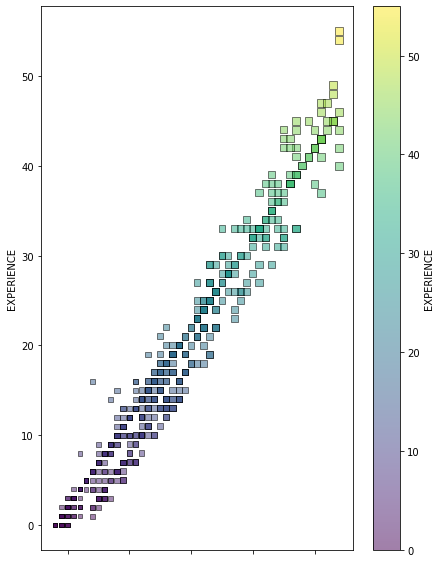

In [4]:
df.plot(figsize = (7,10), kind ='scatter', x = 'AGE', y = 'EXPERIENCE' ,alpha =0.5 ,  c='EXPERIENCE',cmap ='viridis' , marker ='s' , s = 'AGE',edgecolor = 'black')


<AxesSubplot:xlabel='AGE', ylabel='WAGE'>

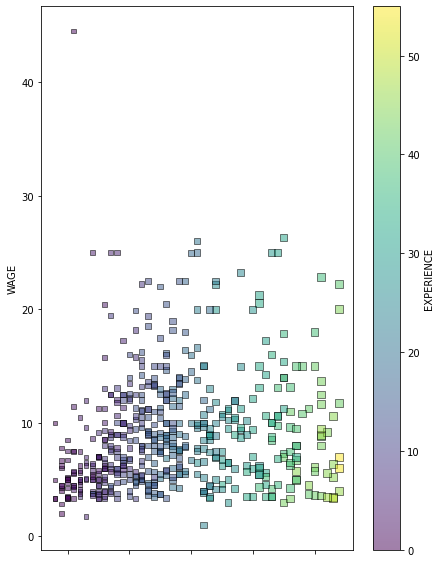

In [5]:
df.plot(figsize = (7,10), kind ='scatter', x = 'AGE', y = 'WAGE' ,alpha =0.5 ,  c='EXPERIENCE',cmap ='viridis' , marker ='s' , s = 'AGE',edgecolor = 'black')


In [10]:
df[['EXPERIENCE','SOUTH','AGE']]

,EXPERIENCE,SOUTH,AGE
EDUCATION,,,
8,21,no,35
9,42,no,57
12,1,no,19
12,4,no,22
12,17,no,35
...,...,...,...
18,5,no,29
12,33,no,51
17,25,no,48


## PIVOT TABLE

In [11]:
df.pivot_table(values='AGE', index='SECTOR',aggfunc=['mean','max','min','median'])

,mean,max,min,median
,AGE,AGE,AGE,AGE
SECTOR,,,,
Construction,40.083333,61,20,42.5
Manufacturing,37.838384,64,19,35.0
Other,36.401460,64,18,35.0


In [ ]:
df.pivot_table(values='AGE',index = 'SECTOR', columns = 'SEX')

SEX,female,male
SECTOR,,
Construction,57.500000,38.500000
Manufacturing,38.666667,37.300000
Other,37.490196,35.328502


<AxesSubplot:xlabel='SECTOR'>

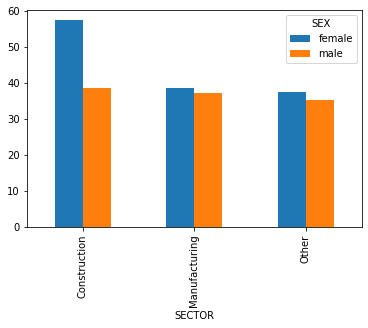

In [ ]:
df.pivot_table(values='AGE',index = 'SECTOR', columns = 'SEX').plot(kind = 'bar')

<AxesSubplot:>

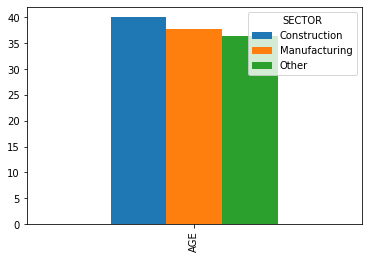

In [ ]:
df.pivot_table(values='AGE', columns = 'SECTOR').plot(kind = 'bar')

## FILTERING DATA

In [ ]:
df['SECTOR']=='Manufacturing'   # this boolean filter

EDUCATION
8      True
9      True
12     True
12    False
12    False
      ...  
18    False
12    False
17    False
12    False
16     True
Name: SECTOR, Length: 534, dtype: bool

In [ ]:
df[df['SECTOR']=='Manufacturing'] # boolean filtering 

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
16,no,male,11,not_member,13.28,33,White,Other,Manufacturing,Married
12,no,male,19,member,11.50,37,White,Other,Manufacturing,Unmarried
...,...,...,...,...,...,...,...,...,...,...
17,no,male,3,not_member,20.40,26,White,Professional,Manufacturing,Unmarried
14,no,male,19,not_member,16.42,39,White,Professional,Manufacturing,Unmarried
18,no,female,37,not_member,22.83,61,White,Professional,Manufacturing,Unmarried


In [ ]:
df[~(df['SECTOR']=='Manufacturing')] # inverted boolean filtering 

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
12,no,male,17,not_member,7.50,35,White,Other,Other,Married
13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
10,yes,male,27,not_member,4.45,43,White,Other,Other,Unmarried
12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...
16,no,female,6,member,11.79,28,White,Professional,Other,Unmarried
18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married


In [ ]:
explt10 = df['EXPERIENCE'] <= 10 #booleaaan filter
df[explt10]

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
12,no,male,9,not_member,8.75,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...
16,no,male,10,member,7.50,32,White,Professional,Other,Married
17,yes,male,2,not_member,7.00,25,White,Professional,Other,Married
15,no,male,10,not_member,12.50,31,White,Professional,Other,Unmarried


<AxesSubplot:>

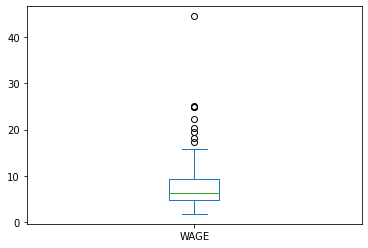

In [ ]:
df[explt10].plot(kind= 'box', x = 'EXPERIENCE', y= 'WAGE')

## Sorting

In [ ]:
df.sort_values(by= 'AGE',inplace = True)

In [ ]:
df.sort_values(by= ['RACE','WAGE'],ascending=[False , True]  )

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
12,no,male,24,not_member,1.00,42,White,Management,Other,Married
12,yes,female,5,not_member,1.75,23,White,Service,Other,Married
13,yes,male,0,not_member,2.01,19,White,Service,Other,Unmarried
12,no,male,1,not_member,2.85,19,White,Other,Other,Unmarried
12,yes,female,28,not_member,3.00,46,White,Clerical,Other,Married
...,...,...,...,...,...,...,...,...,...,...
13,no,male,16,not_member,9.10,35,Hispanic,Clerical,Other,Unmarried
16,no,male,7,member,10.00,29,Hispanic,Management,Other,Married
12,yes,female,30,not_member,11.25,48,Hispanic,Management,Other,Married


## Groupby

In [ ]:
df.groupby('OCCUPATION')['EXPERIENCE'].mean()

OCCUPATION
Clerical        17.577320
Management      18.072727
Other           18.064103
Professional    15.457143
Sales           18.447368
Service         20.192771
Name: EXPERIENCE, dtype: float64

In [ ]:
df.groupby('OCCUPATION')['EXPERIENCE'].agg(['mean','min','max','median','std'])

,mean,min,max,median,std
OCCUPATION,,,,,
Clerical,17.577320,0,45,15.0,12.124214
Management,18.072727,1,42,15.0,11.375501
Other,18.064103,0,55,15.0,12.448438
Professional,15.457143,0,42,13.0,10.275090
Sales,18.447368,0,45,15.5,13.492135
Service,20.192771,0,54,17.0,14.718876


In [ ]:
df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].agg(['mean','min','max','median','std'])

C:\Users\WIN\AppData\Local\Temp\ipykernel_7788\1793842026.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].agg(['mean','min','max','median','std'])


EXPERIENCE                                 WAGE               \
                   mean min max median        std       mean   min    max   
OCCUPATION                                                                  
Clerical      17.577320   0  45   15.0  12.124214   7.422577  3.00  15.03   
Management    18.072727   1  42   15.0  11.375501  12.704000  1.00  44.50   
Other         18.064103   0  55   15.0  12.448438   8.426474  2.85  26.00   
Professional  15.457143   0  42   13.0  10.275090  11.947429  4.35  24.98   
Sales         18.447368   0  45   15.5  13.492135   7.592632  3.35  19.98   
Service       20.192771   0  54   17.0  14.718876   6.537470  1.75  25.00   

                                
              median       std  
OCCUPATION                      
Clerical       7.500  2.699018  
Management    10.620  7.572513  
Other          7.150  4.250734  
Professional  10.610  5.523833  
Sales          5.725  4.232272  
Service        5.500  3.673278

In [ ]:
df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean()

C:\Users\WIN\AppData\Local\Temp\ipykernel_7788\3989577191.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean()


,EXPERIENCE,WAGE
OCCUPATION,,
Clerical,17.577320,7.422577
Management,18.072727,12.704000
Other,18.064103,8.426474
Professional,15.457143,11.947429
Sales,18.447368,7.592632
Service,20.192771,6.537470


C:\Users\WIN\AppData\Local\Temp\ipykernel_7788\1062006507.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind= 'box')


<AxesSubplot:>

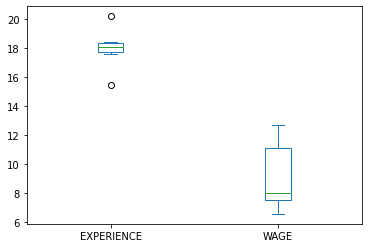

In [ ]:

df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind= 'box')